## Random number generation

Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Uniform random numbers

We use `np.random` module and we need to specify the lowest number highest number and how many numbers should system generate in this interval

The function `uniform()` in the np.random module generates random numbers on the interval [low, high) from a Uniform distribution. The size parameter is how many random numbers, and is all of Numpy's random number generators. The function returns a NumPy array.

(array([12., 12.,  7., 11., 13.,  7., 14.,  8.,  8.,  8.]),
 array([0.01796206, 0.21437941, 0.41079676, 0.6072141 , 0.80363145,
        1.00004879, 1.19646614, 1.39288348, 1.58930083, 1.78571818,
        1.98213552]),
 <BarContainer object of 10 artists>)

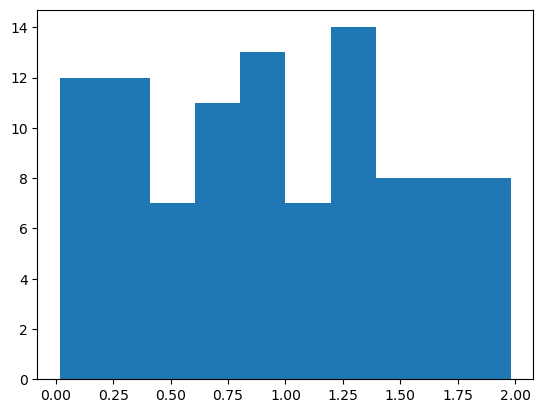

In [7]:
x = np.random.uniform(low=0, high=2, size=100)

plt.hist(x)

To simulate an unfair coin

[ True  True  True False  True  True False False  True  True  True  True
  True  True False  True  True  True  True False]

There were 15 heads. (and 5 tails)


([<matplotlib.patches.Wedge at 0x1dd0e60a0d0>,
 [Text(-0.7778174593052023, 0.7778174593052024, 'heads'),
  Text(0.7778174593052022, -0.7778174593052025, 'Tails')])

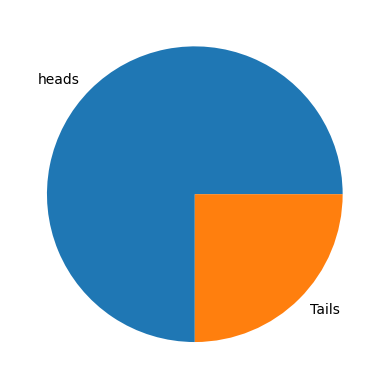

In [22]:
size = 20
# Generate size random numbers on uniform interval

x = np.random.uniform(low=0, high=1, size=size)

# Make the coin flips (< 0.7 means we have a 70% chance of heads)
heads = x < 0.7

# Show which were heads, and count the number of heads
print(heads)
heads_count= heads.sum() # np.sum(heads)
tails_count = size - heads_count
print(f"\nThere were { heads_count} heads. (and {tails_count} tails)")
labels = ["heads", "Tails"]
plt.pie(np.array([heads_count, tails_count]), labels = labels)


### Choice of generator

there are two different generator
- **Mersenne Twister Algorithm**
- **PCG64** - this is default

(array([5., 1., 2., 2., 1., 1., 1., 2., 3., 2.]),
 array([0.020225  , 0.11735608, 0.21448717, 0.31161826, 0.40874934,
        0.50588043, 0.60301152, 0.7001426 , 0.79727369, 0.89440478,
        0.99153586]),
 <BarContainer object of 10 artists>)

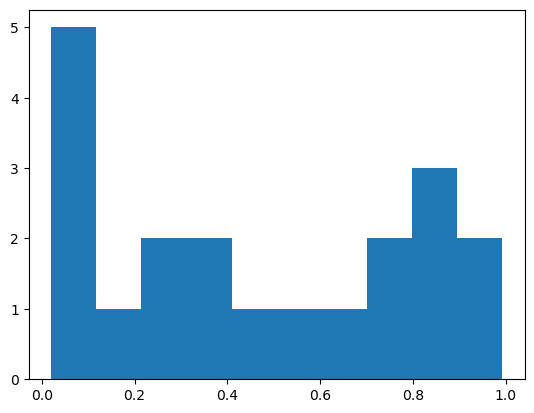

In [10]:
rng = np.random.default_rng()
x = rng.uniform(low=0, high=1, size=20)
plt.hist(x)

### Seeding random number generators

to get the same sequence of random numbers we need to use the same seed

In [11]:
# Instantiate generator with a seed
rng = np.random.default_rng(seed=3252)

# Draw random numbers
rng.uniform(size=10)

array([0.18866535, 0.04418857, 0.02961285, 0.22083971, 0.43341773,
       0.13166813, 0.42112164, 0.43507845, 0.61380912, 0.30627603])

In [12]:
# If we reinstantiate with the same seed, we get the same sequence of random numbers.

# Re-seed the RNG
rng = np.random.default_rng(seed=3252)

# Draw random numbers
rng.uniform(size=10)

array([0.18866535, 0.04418857, 0.02961285, 0.22083971, 0.43341773,
       0.13166813, 0.42112164, 0.43507845, 0.61380912, 0.30627603])

The random number sequence is exactly the same. If we choose a different seed, we get totally different random numbers.

### Drawing random numbers out of the other distributions
Say we wanted to draw random samples from a Normal distribution with mean *μ* and standard deviation *σ*.

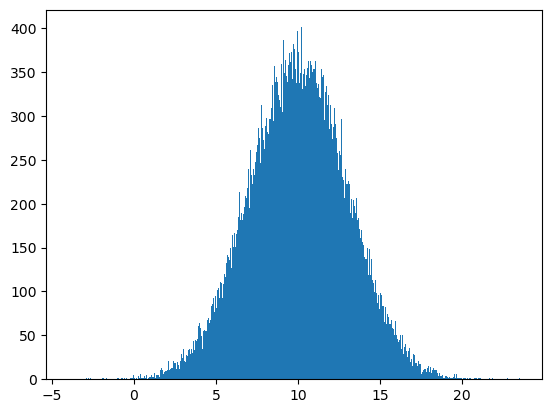

In [13]:
# Set parameters
mu = 10
sigma = 3

# Draw 100000 random samples
x = rng.normal(mu, sigma, size=100000)


plt.hist(x, bins=1000)
plt.show()

### Selections from discrete distributions

To drawn from a binomial distribution we use `rng.binomial()`


In [14]:
# Draw how many coin flips land heads in 10 files
rng.binomial(10, 0.5)

6

In [15]:
rng = np.random.default_rng(seed=126969234)
rng.integers(0, 51, size=20)

array([12, 31, 47, 26,  3,  5, 46, 49, 26, 38, 24, 17, 46, 26,  6, 17, 35,
        4, 13, 29], dtype=int64)

Sample 17 was selected twice and sample 26 was selected thrice. This is not unexpected. We can use rng.choice() instead.

Now, because we chose replace=False, we do not get any repeats.

In [16]:
rng.choice(np.arange(51), size=20, replace=False)

array([27, 34,  0, 46,  2, 48, 35, 50, 40, 12, 28, 19, 37, 38, 11, 23, 45,
       15, 29, 32])

### Generating random sequences

Because it works with selecting characters as well as numbers, we can use the `rng.choice()` function to generate random DNA sequences.

In [17]:
"".join(rng.choice(list("ATGC"), replace=True, size=70))

'CTTGTAAAGGATCTGCCCCGTGTCCCGCGCTAGGTCCGCACTCAAAGTATCTATGAACCGTCCAACCGAG'

### Shuffling an array

Similarly, the `rng.permutation()` function is useful. It takes the entries in an array and shuffles them! Let's shuffle a deck of cards.

In [18]:
rng.permutation(np.arange(53))

array([ 4,  1, 43, 46, 11, 21, 44, 18, 13, 49, 32, 47,  2, 28, 40, 52, 17,
       29, 27,  0, 14, 48, 37, 31, 20, 30, 36,  3, 45, 24, 50,  9, 22, 25,
        5, 12, 42, 19, 16, 39,  7, 34, 35, 10, 33, 41, 51, 26,  6,  8, 15,
       38, 23])